In [13]:
import games
import numpy as np
import matplotlib.pyplot as plt

population = 100

# np.random.seed(50)


results = games.group_split_game(population, 20, 50, 0.1, 0.1, 20, '')

Agent 0 GenStart Group: 14 Reward: 9.5
Agent 0 After TS Group: 9, Strategy: 0
Agent 0 After GS Group: 9, Strategy: 0
Agent 0 GenStart Group: 9 Reward: 10.0
Agent 0 After TS Group: 9, Strategy: 0
Agent 0 After GS Group: 9, Strategy: 0
Agent 0 GenStart Group: 9 Reward: 10.0
Agent 0 After TS Group: 9, Strategy: 0
Agent 0 After GS Group: 9, Strategy: 0
Agent 0 GenStart Group: 9 Reward: 10.0
Agent 0 After TS Group: 9, Strategy: 0
Agent 0 After GS Group: 9, Strategy: 0
Agent 0 GenStart Group: 9 Reward: 10.0
Agent 0 After TS Group: 9, Strategy: 0
Agent 0 After GS Group: 9, Strategy: 0
Agent 0 GenStart Group: 9 Reward: 10.0
Agent 0 After TS Group: 9, Strategy: 0
Agent 0 After GS Group: 9, Strategy: 0
Agent 0 GenStart Group: 9 Reward: 10.0
Agent 0 After TS Group: 9, Strategy: 0
Agent 0 After GS Group: 9, Strategy: 0
Agent 0 GenStart Group: 9 Reward: 10.0
Agent 0 After TS Group: 9, Strategy: 0
Agent 0 After GS Group: 9, Strategy: 0
Agent 0 GenStart Group: 9 Reward: 10.0
Agent 0 After TS Group: 9

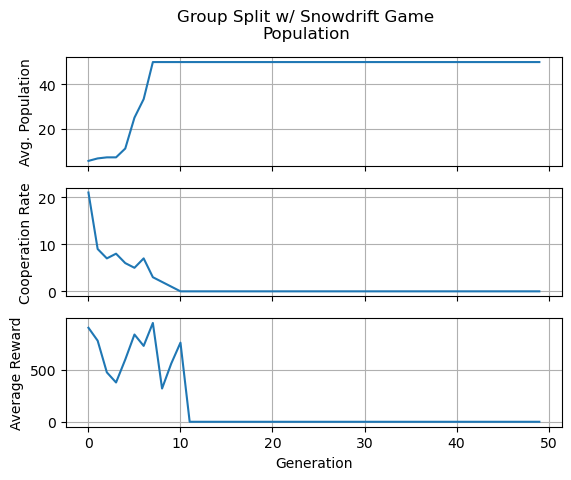

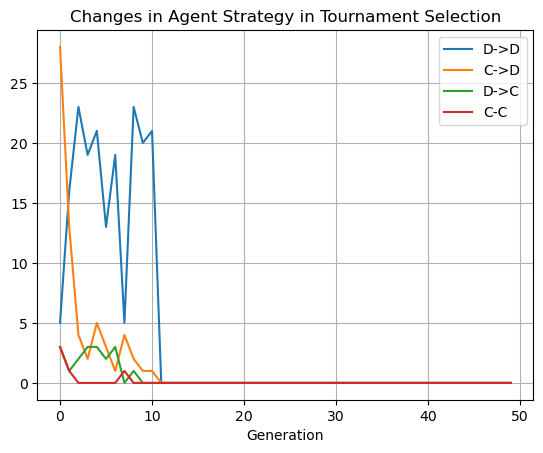

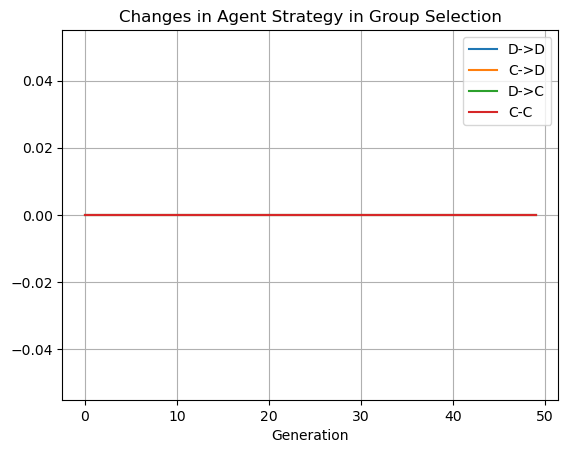

C:\Users\w_pit\AppData\Local\Temp\ipykernel_53388\2146523191.py:46: RuntimeWarning: invalid value encountered in divide
  ax[1].plot(np.divide(results[1][idx], results[0][idx]))
C:\Users\w_pit\AppData\Local\Temp\ipykernel_53388\2146523191.py:47: RuntimeWarning: invalid value encountered in divide
  ax[2].plot(np.divide(results[2][idx], results[0][idx]))


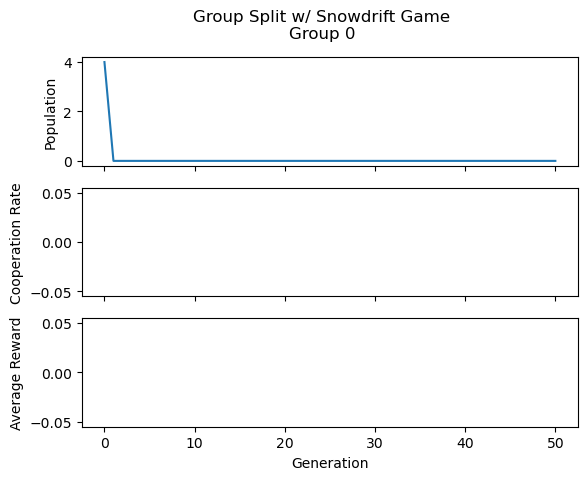

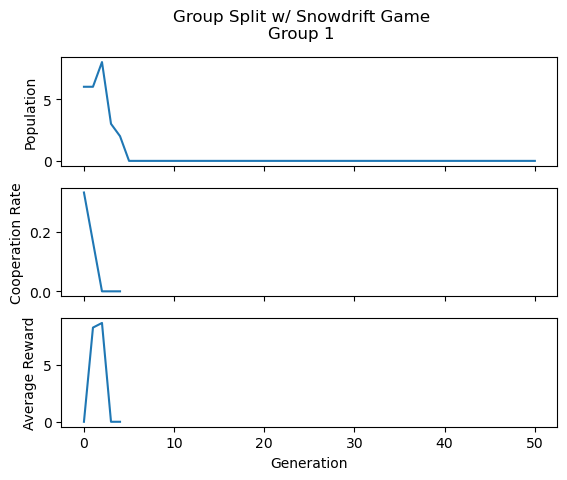

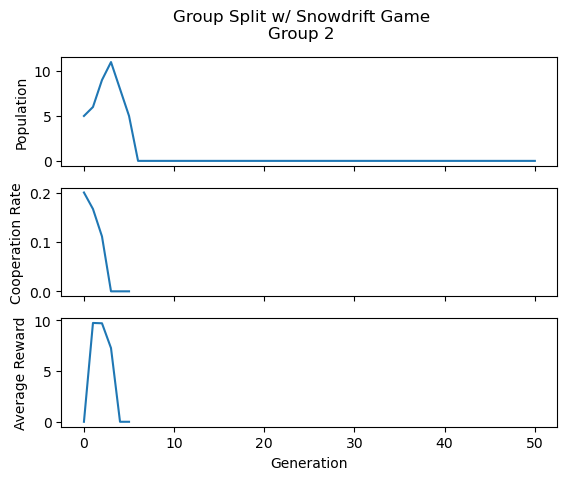

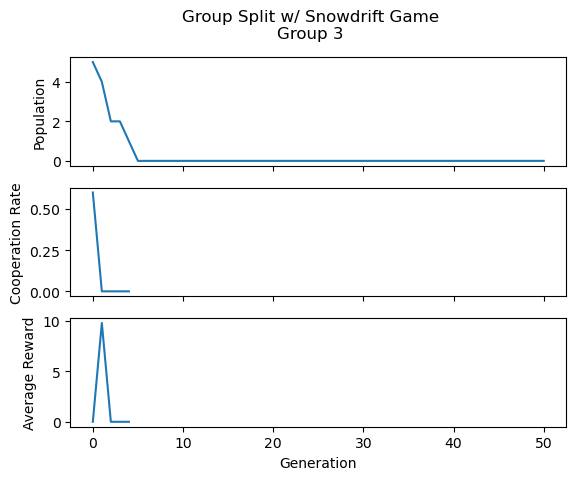

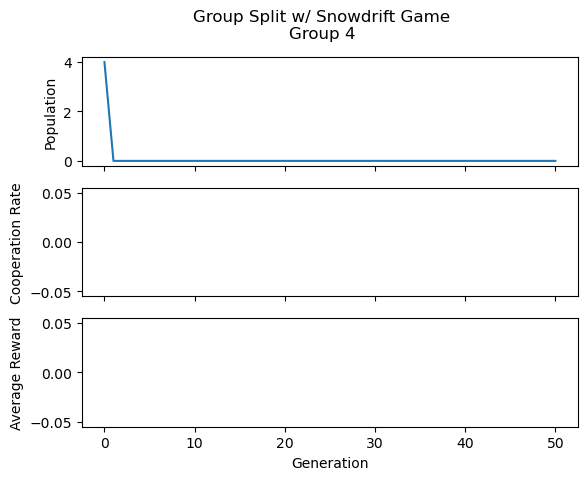

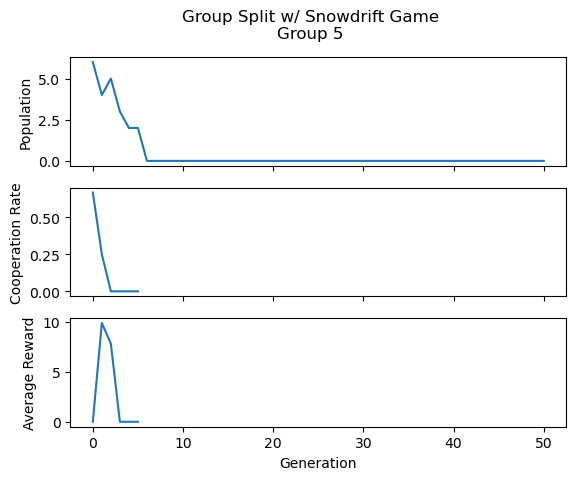

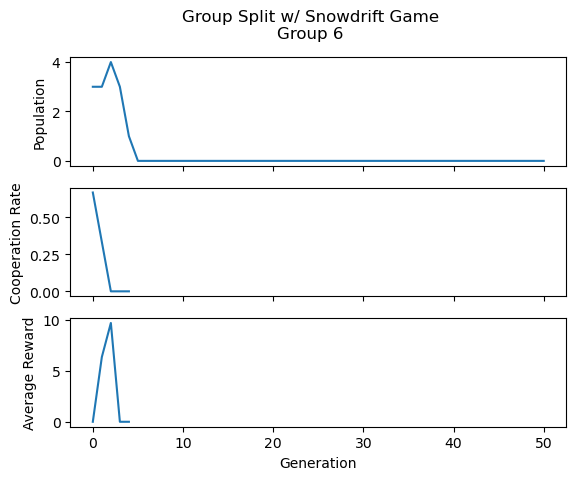

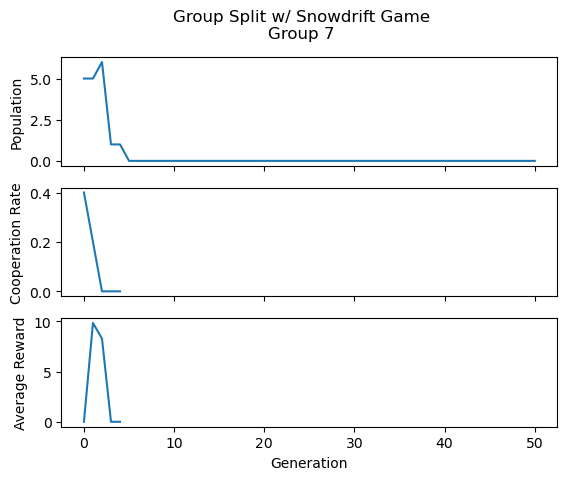

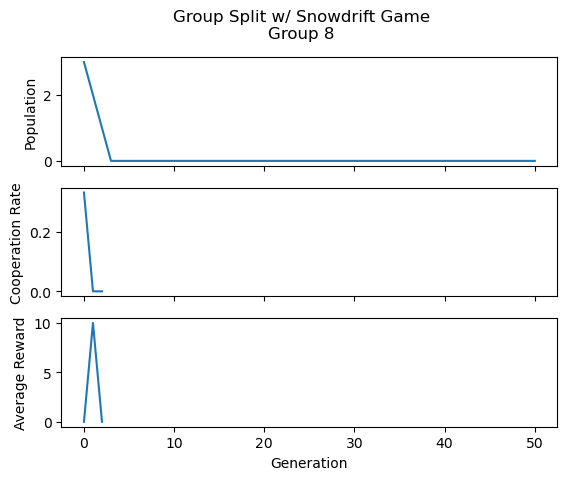

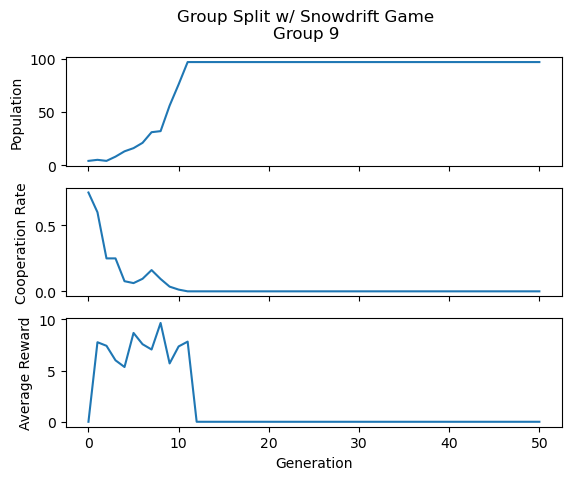

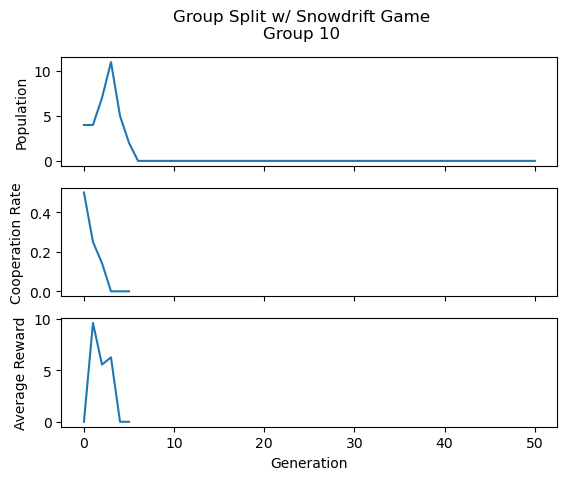

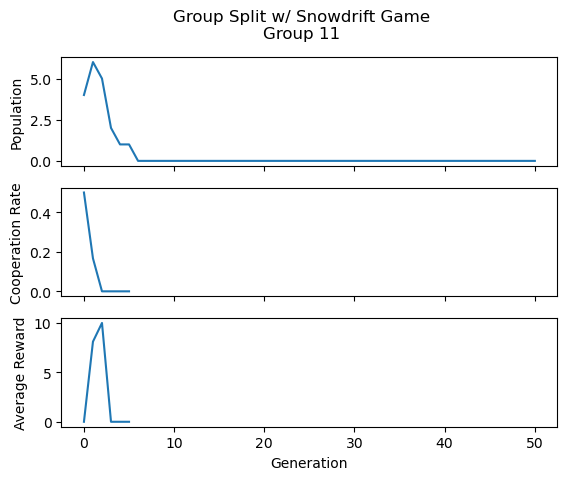

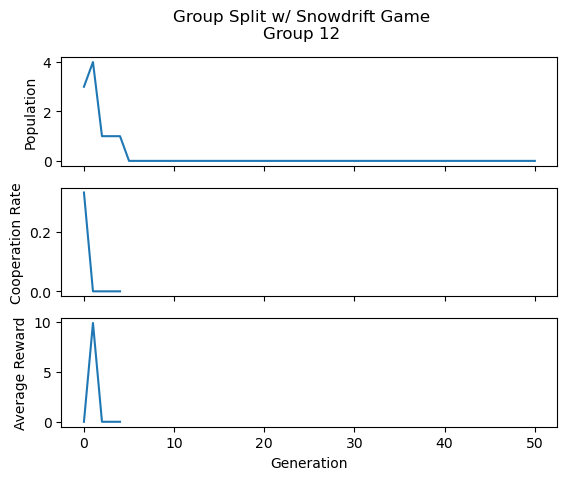

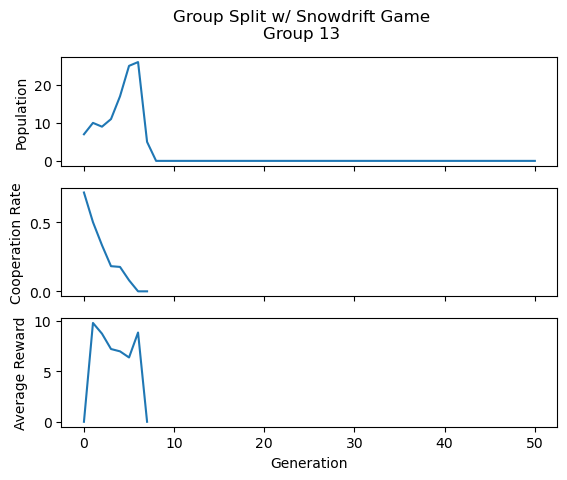

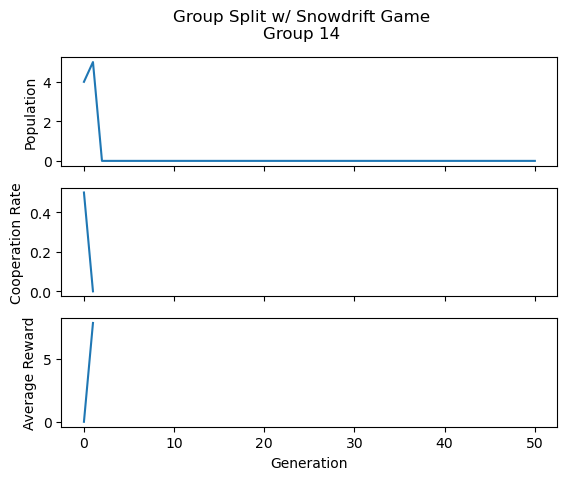

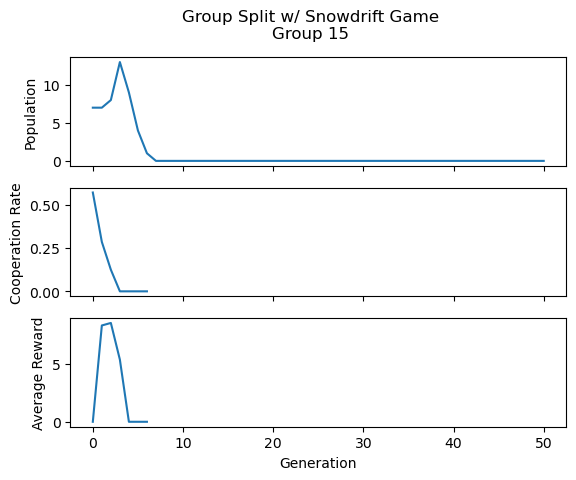

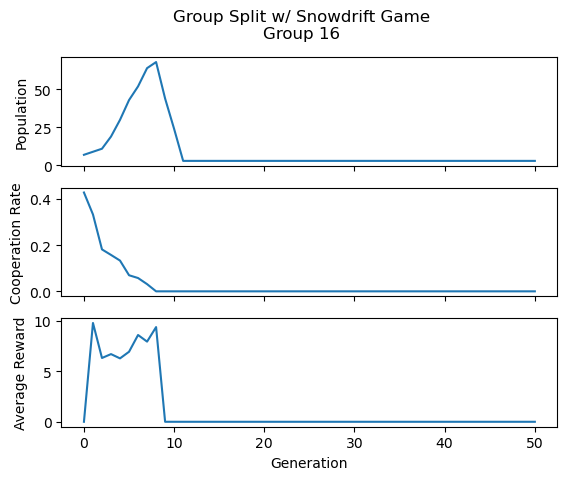

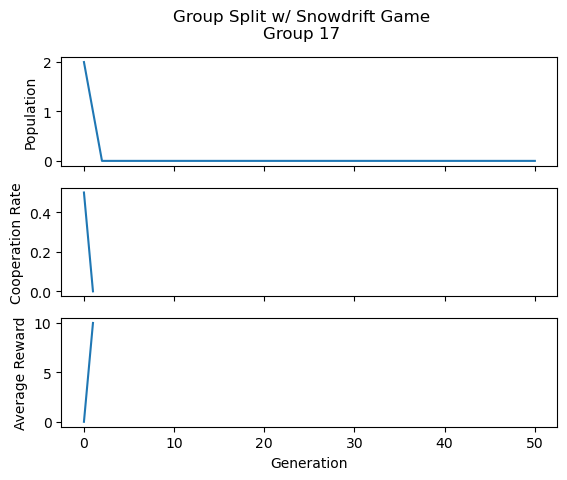

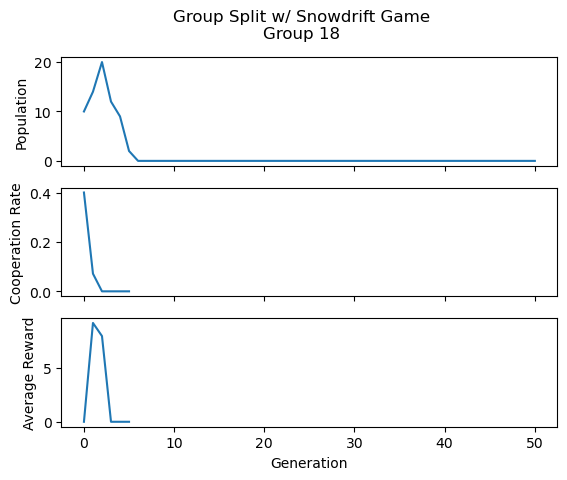

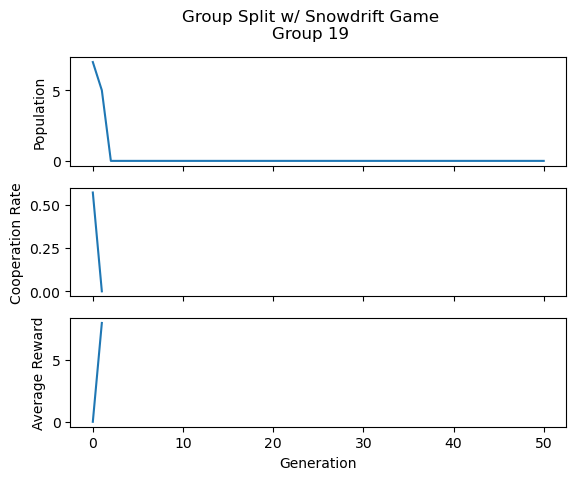

In [14]:
# Plot Population Statistics
fig, ax = plt.subplots(3, sharex=True)

ax[0].plot(results[3])
ax[1].plot(results[4])
ax[2].plot(results[5])
ax[0].set_ylabel('Avg. Population')
ax[1].set_ylabel('Cooperation Rate')
ax[2].set_ylabel('Average Reward')
ax[0].grid()
ax[1].grid()
ax[2].grid()

plt.suptitle(f'Group Split w/ Snowdrift Game\nPopulation')
plt.xlabel('Generation')
plt.show()


plt.plot(results[6][0])
plt.plot(results[6][1])
plt.plot(results[6][2])
plt.plot(results[6][3])
plt.legend(['D->D', 'C->D', 'D->C', 'C-C'])
plt.title('Changes in Agent Strategy in Tournament Selection')
plt.xlabel('Generation')
plt.grid()
plt.show()

plt.plot(results[7][0])
plt.plot(results[7][1])
plt.plot(results[7][2])
plt.plot(results[7][3])
plt.legend(['D->D', 'C->D', 'D->C', 'C-C'])
plt.title('Changes in Agent Strategy in Group Selection')
plt.xlabel('Generation')
plt.grid()
plt.show()

# Plot Group Statistics
for idx in range(len(results[0])):
    fig, ax = plt.subplots(3, sharex=True)

    ax[0].plot(results[0][idx])
    # ax[1].plot(results[1][idx])
    # ax[2].plot(results[2][idx])
    ax[1].plot(np.divide(results[1][idx], results[0][idx]))
    ax[2].plot(np.divide(results[2][idx], results[0][idx]))
    ax[0].set_ylabel('Population')
    ax[1].set_ylabel('Cooperation Rate')
    ax[2].set_ylabel('Average Reward')
    
    plt.suptitle(f'Group Split w/ Snowdrift Game\nGroup {idx}')
    plt.xlabel('Generation')
    plt.show()

[[1.0, 1.0, 0.23, 1.0, 1.0, 1.0, 1.0, 1.0, 0.11, 1.0], [1.0, 0.12, 0.22, 1.0, 0.43, 1.0, 1.0, 1.0, 0.12, 1.0], [1.0, 0.25, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.09, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.07, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.92, 0.26, 0.1, 1.0], [1.0, 1.0, 1.0, 1.0, 0.14, 1.0, 1.0, 0.2, 1.0, 1.0], [1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.23, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 0.48, 1.0, 1.0, 0.16, 1.0], [0.33, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.14, 1.0, 1.0], [1.0, 0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]
[0.834 0.689 0.925 0.816 0.828 0.834 0.843 0.864 0.847 0.94 ]
[0.33308257 0.38921588 0.225      0.36802717 0.32682717 0.33227097
 0.31407165 0.28125433 0.30893527 0.18      ]


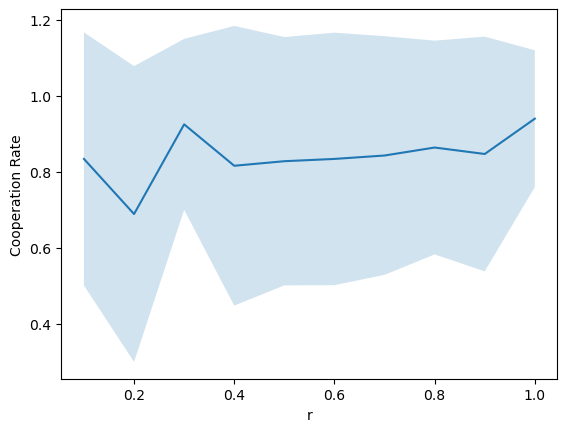

In [1]:
import games
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing

num_runs = 10
population = 100
r_values = np.divide((range(10, 110, 10)), 100)

args = [[num_runs, population, 30, 50, r, 0.25, 20, 'equal'] for r in r_values]
with multiprocessing.Pool() as pool:

    results = pool.starmap(games.group_split_game_averaged, args)
    means = np.mean(results, axis=1)
    errors = np.std(results, axis=1)
    
    print(results)
    print(means)
    print(errors)

    plt.plot(r_values, means)
    plt.fill_between(r_values, means - errors, means + errors, alpha=0.2)
    plt.ylabel('Cooperation Rate')
    plt.xlabel('r')
    plt.show()

    # plt.boxplot(results, positions=r_values)
    # plt.ylabel('Cooperation Rate')
    # plt.xlabel('r (cost/benefit)')
    # plt.title('Group Split w/ Snowdrift Game')
    # plt.show()


In [15]:
import games
import numpy as np
import matplotlib.pyplot as plt

population = 100

num_generations = 150
num_simulations = 10
# np.random.seed(50)

all_results = [games.group_split_game(population, 20, num_generations, 0.1, 0.1, 20, 'equal') for _ in range(num_simulations)]

population_per_gen = [all_results[i][3] for i in range(num_simulations)]
mean_population_per_gen = np.mean(population_per_gen, axis=0)
std_population_per_gen = np.std(population_per_gen, axis=0)

cooperation_per_gen = [all_results[i][4] for i in range(num_simulations)]
mean_cooperation_per_gen = np.mean(cooperation_per_gen, axis=0)
std_cooperation_per_gen = np.std(cooperation_per_gen, axis=0)

total_reward_per_gen = [all_results[i][5] for i in range(num_simulations)]
mean_total_reward_per_gen = np.mean(total_reward_per_gen, axis=0)
std_total_reward_per_gen = np.std(total_reward_per_gen, axis=0)

# temp = np.sum(population_per_gen, axis=1)
# min_population_per_gen = population_per_gen[np.argmin(temp)]
# max_population_per_gen = population_per_gen[np.argmax(temp)]

# summed_cooperation = np.sum(population_per_gen, axis=1)
# min_cooperation_per_gen = cooperation_per_gen[np.argmin(summed_cooperation)]
# max_cooperation_per_gen = cooperation_per_gen[np.argmax(summed_cooperation)]

# summed_total_reward = np.sum(total_reward_per_gen, axis=1)
# min_total_reward_per_gen = total_reward_per_gen[np.argmin(summed_total_reward)]
# max_total_reward_per_gen = total_reward_per_gen[np.argmax(summed_total_reward)]


Agent 0 GenStart Group: 16 Reward: 10.0
Agent 0 After TS Group: 16, Strategy: 0
Agent 0 After GS Group: 11, Strategy: 0
Agent 0 GenStart Group: 11 Reward: 10.0
Agent 0 After TS Group: 11, Strategy: 0
Agent 0 After GS Group: 6, Strategy: 0
Agent 0 GenStart Group: 6 Reward: 0
Agent 0 After TS Group: 8, Strategy: 0
Agent 0 After GS Group: 8, Strategy: 0
Agent 0 GenStart Group: 8 Reward: 10.0
Agent 0 After TS Group: 8, Strategy: 0
Agent 0 After GS Group: 19, Strategy: 0
Agent 0 GenStart Group: 19 Reward: 10.0
Agent 0 After TS Group: 19, Strategy: 0
Agent 0 After GS Group: 19, Strategy: 0
Agent 0 GenStart Group: 19 Reward: 10.0
Agent 0 After TS Group: 19, Strategy: 0
Agent 0 After GS Group: 6, Strategy: 0
Agent 0 GenStart Group: 6 Reward: 0
Agent 0 After TS Group: 9, Strategy: 0
Agent 0 After GS Group: 9, Strategy: 0
Agent 0 GenStart Group: 9 Reward: 10.0
Agent 0 After TS Group: 9, Strategy: 0
Agent 0 After GS Group: 16, Strategy: 0
Agent 0 GenStart Group: 16 Reward: 10.0
Agent 0 After TS G

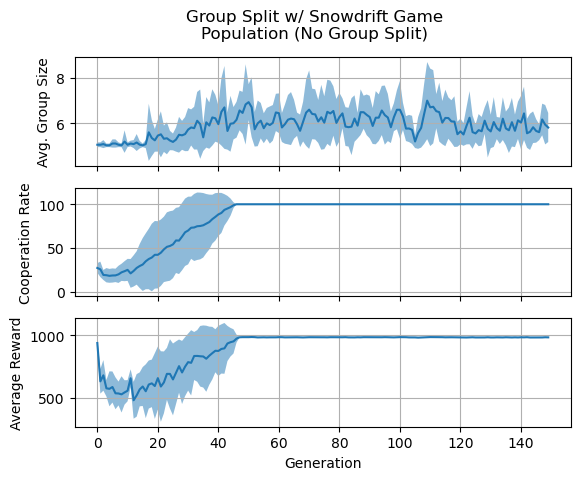

In [17]:
# Plot Population Statistics
fig, ax = plt.subplots(3, sharex=True)

ax[0].plot(mean_population_per_gen)
ax[1].plot(mean_cooperation_per_gen)
ax[2].plot(mean_total_reward_per_gen)
ax[0].fill_between(np.arange(num_generations), mean_population_per_gen - std_population_per_gen, mean_population_per_gen + std_population_per_gen, alpha=0.5)
ax[1].fill_between(np.arange(num_generations), mean_cooperation_per_gen - std_cooperation_per_gen, mean_cooperation_per_gen + std_cooperation_per_gen, alpha=0.5)
ax[2].fill_between(np.arange(num_generations), mean_total_reward_per_gen - std_total_reward_per_gen, mean_total_reward_per_gen + std_total_reward_per_gen, alpha=0.5)
# ax[0].plot(min_population_per_gen)
# ax[1].plot(min_cooperation_per_gen)
# ax[2].plot(min_total_reward_per_gen)
# ax[0].plot(max_population_per_gen)
# ax[1].plot(max_cooperation_per_gen)
# ax[2].plot(max_total_reward_per_gen)
ax[0].set_ylabel('Avg. Group Size')
ax[1].set_ylabel('Cooperation Rate')
ax[2].set_ylabel('Average Reward')
ax[0].grid()
ax[1].grid()
ax[2].grid()


plt.suptitle(f'Group Split w/ Snowdrift Game\nPopulation (No Group Split)')
plt.xlabel('Generation')
plt.show()


In [1]:
import games
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.pool import Pool

# np.random.seed(50)

population = 100
num_generations = 150
num_simulations = 100

cost_benefit_ratios = [0.1, 0.3, 0.55, 0.8, 1]

args = [[population, 20, num_generations, r, 2, 20, 'empty'] for r in cost_benefit_ratios]
with Pool() as pool:
    many_results = pool.starmap(games.group_split_game_many, [[num_simulations] + arg for arg in args])


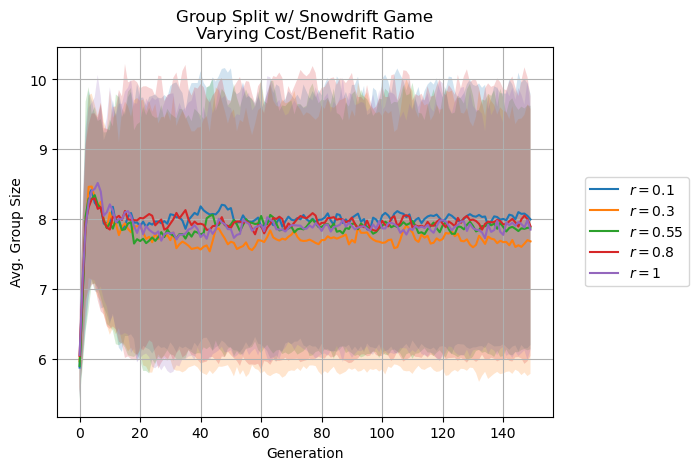

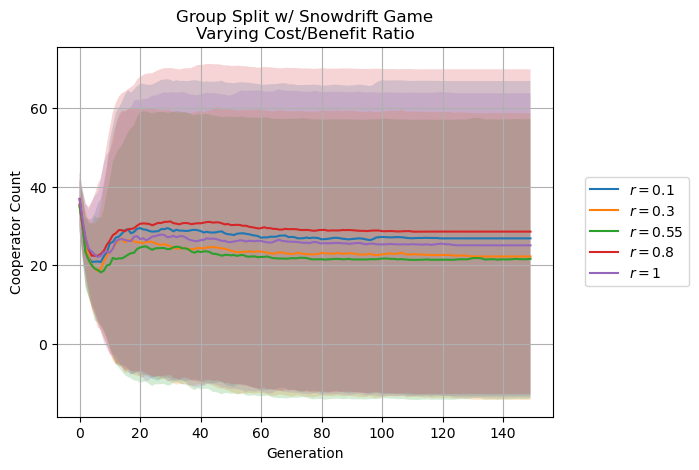

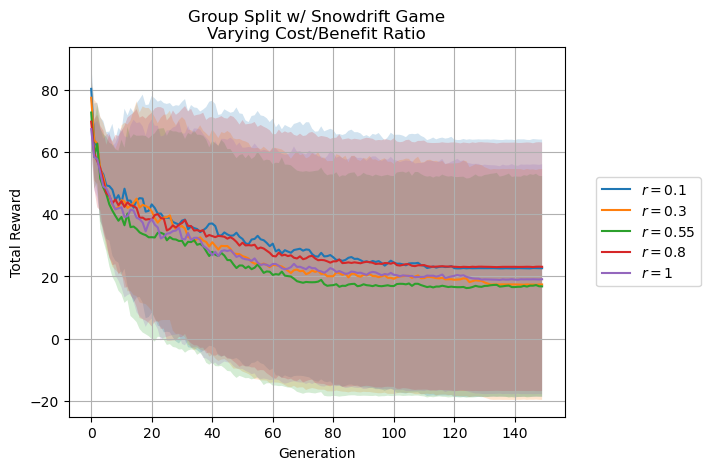

In [2]:

population_per_gen = [[many_results[i][j][3] for j in range(num_simulations)] for i in range(len(cost_benefit_ratios))]
mean_population_per_gen = np.mean(population_per_gen, axis=1)
std_population_per_gen = np.std(population_per_gen, axis=1)

cooperation_per_gen = [[many_results[i][j][4] for j in range(num_simulations)] for i in range(len(cost_benefit_ratios))]
mean_cooperation_per_gen = np.mean(cooperation_per_gen, axis=1)
std_cooperation_per_gen = np.std(cooperation_per_gen, axis=1)

total_reward_per_gen = [[many_results[i][j][5] for j in range(num_simulations)] for i in range(len(cost_benefit_ratios))]
mean_total_reward_per_gen = np.mean(total_reward_per_gen, axis=1)
std_total_reward_per_gen = np.std(total_reward_per_gen, axis=1)

# Plot Population Statistics
plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for i in range(len(cost_benefit_ratios)):
    plt.plot(mean_population_per_gen[i], label=f'$r={cost_benefit_ratios[i]}$')
    plt.fill_between(np.arange(num_generations), mean_population_per_gen[i] - std_population_per_gen[i], 
                     mean_population_per_gen[i] + std_population_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Avg. Group Size')
plt.xlabel('Generation')
plt.grid()
plt.show()

plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for i in range(len(cost_benefit_ratios)):
    plt.plot(mean_cooperation_per_gen[i], label=f'$r={cost_benefit_ratios[i]}$')
    plt.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Cooperator Count')
plt.xlabel('Generation')
plt.grid()
plt.show()

plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for i in range(len(cost_benefit_ratios)):
    plt.plot(mean_total_reward_per_gen[i], label=f'$r={cost_benefit_ratios[i]}$')
    plt.fill_between(np.arange(num_generations), mean_total_reward_per_gen[i] - std_total_reward_per_gen[i], 
                     mean_total_reward_per_gen[i] + std_total_reward_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Total Reward')
plt.xlabel('Generation')
plt.grid()
plt.show()


In [3]:
import games
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.pool import Pool

# np.random.seed(50)

population = 100
num_generations = 150
num_simulations = 100

group_split_sizes = [5, 10, 20, 50, 100]

args = [[population, 20, num_generations, 0.5, 2, gss, 'empty'] for gss in group_split_sizes]
with Pool() as pool:
    many_results = pool.starmap(games.group_split_game_many, [[num_simulations] + arg for arg in args])


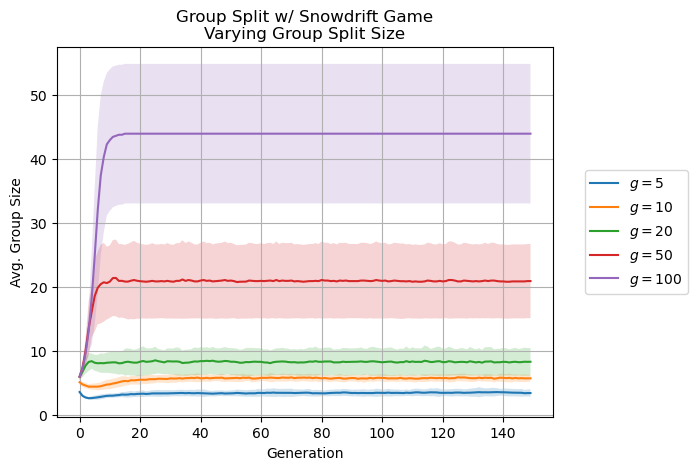

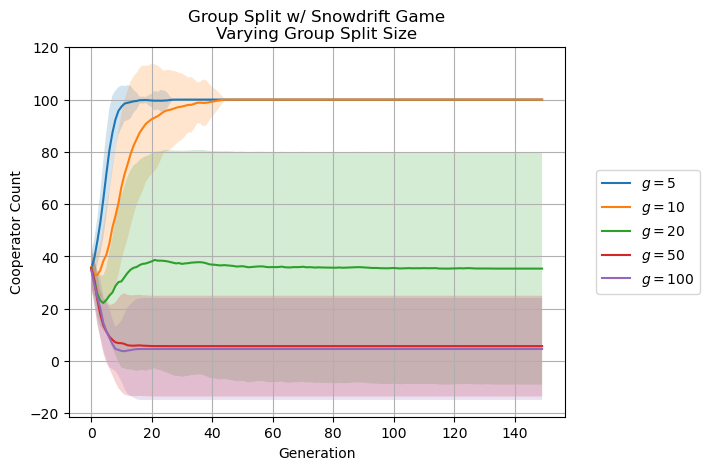

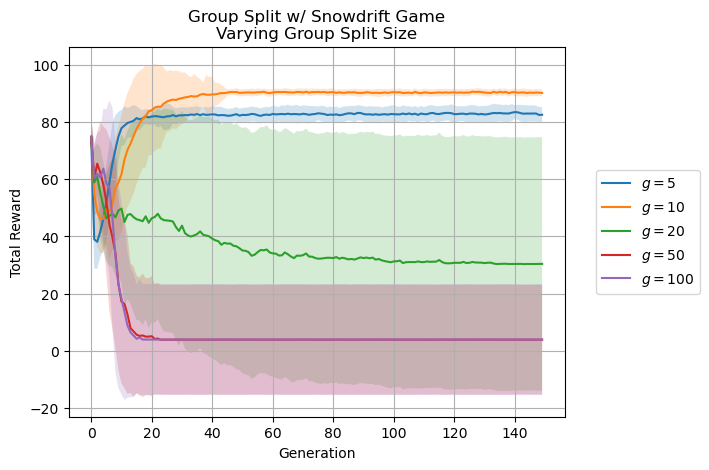

In [4]:

population_per_gen = [[many_results[i][j][3] for j in range(num_simulations)] for i in range(len(group_split_sizes))]
mean_population_per_gen = np.mean(population_per_gen, axis=1)
std_population_per_gen = np.std(population_per_gen, axis=1)

cooperation_per_gen = [[many_results[i][j][4] for j in range(num_simulations)] for i in range(len(group_split_sizes))]
mean_cooperation_per_gen = np.mean(cooperation_per_gen, axis=1)
std_cooperation_per_gen = np.std(cooperation_per_gen, axis=1)

total_reward_per_gen = [[many_results[i][j][5] for j in range(num_simulations)] for i in range(len(group_split_sizes))]
mean_total_reward_per_gen = np.mean(total_reward_per_gen, axis=1)
std_total_reward_per_gen = np.std(total_reward_per_gen, axis=1)

# Plot Population Statistics
plt.title(f'Group Split w/ Snowdrift Game\nVarying Group Split Size')
for i in range(len(group_split_sizes)):
    plt.plot(mean_population_per_gen[i], label=f'$g={group_split_sizes[i]}$')
    plt.fill_between(np.arange(num_generations), mean_population_per_gen[i] - std_population_per_gen[i], 
                     mean_population_per_gen[i] + std_population_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Avg. Group Size')
plt.xlabel('Generation')
plt.grid()
plt.show()

plt.title(f'Group Split w/ Snowdrift Game\nVarying Group Split Size')
for i in range(len(group_split_sizes)):
    plt.plot(mean_cooperation_per_gen[i], label=f'$g={group_split_sizes[i]}$')
    plt.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Cooperator Count')
plt.xlabel('Generation')
plt.grid()
plt.show()

plt.title(f'Group Split w/ Snowdrift Game\nVarying Group Split Size')
for i in range(len(group_split_sizes)):
    plt.plot(mean_total_reward_per_gen[i], label=f'$g={group_split_sizes[i]}$')
    plt.fill_between(np.arange(num_generations), mean_total_reward_per_gen[i] - std_total_reward_per_gen[i], 
                     mean_total_reward_per_gen[i] + std_total_reward_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Total Reward')
plt.xlabel('Generation')
plt.grid()
plt.show()


In [5]:
import games
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.pool import Pool

# np.random.seed(50)

population = 100
num_generations = 150
num_simulations = 100

cooperation_thresholds = [0, 2, 5, 10, 20]

args = [[population, 20, num_generations, 0.5, ct, 20, 'empty'] for ct in cooperation_thresholds]
with Pool() as pool:
    many_results = pool.starmap(games.group_split_game_many, [[num_simulations] + arg for arg in args])


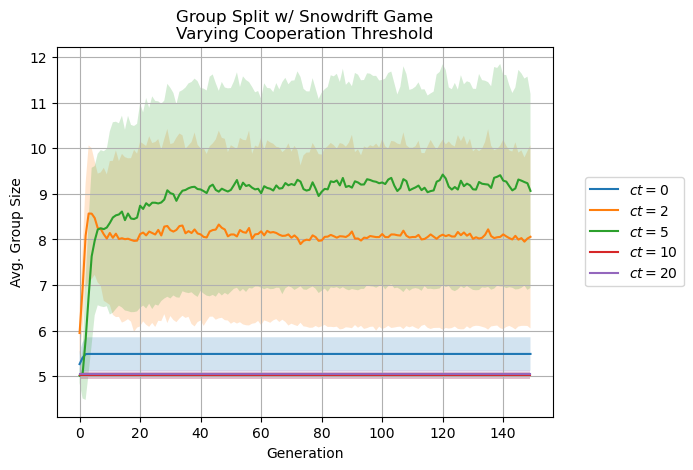

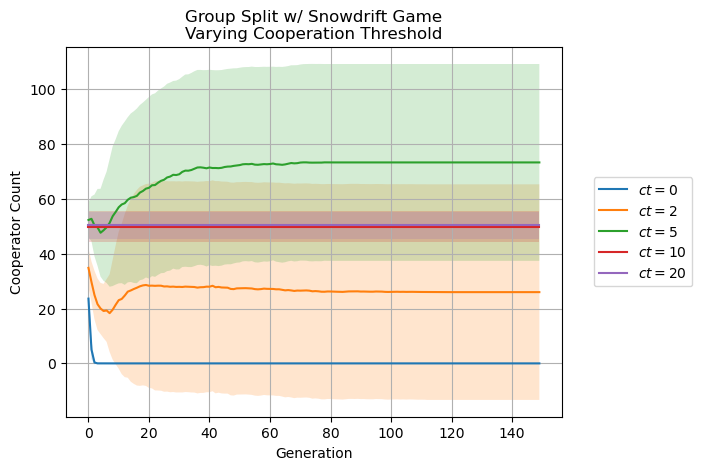

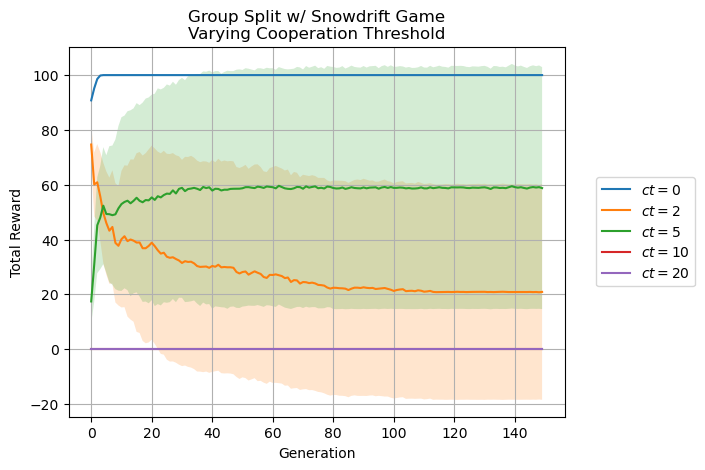

In [6]:

population_per_gen = [[many_results[i][j][3] for j in range(num_simulations)] for i in range(len(cooperation_thresholds))]
mean_population_per_gen = np.mean(population_per_gen, axis=1)
std_population_per_gen = np.std(population_per_gen, axis=1)

cooperation_per_gen = [[many_results[i][j][4] for j in range(num_simulations)] for i in range(len(cooperation_thresholds))]
mean_cooperation_per_gen = np.mean(cooperation_per_gen, axis=1)
std_cooperation_per_gen = np.std(cooperation_per_gen, axis=1)

total_reward_per_gen = [[many_results[i][j][5] for j in range(num_simulations)] for i in range(len(cooperation_thresholds))]
mean_total_reward_per_gen = np.mean(total_reward_per_gen, axis=1)
std_total_reward_per_gen = np.std(total_reward_per_gen, axis=1)

# Plot Population Statistics
plt.title(f'Group Split w/ Snowdrift Game\nVarying Cooperation Threshold')
for i in range(len(cooperation_thresholds)):
    plt.plot(mean_population_per_gen[i], label=f'$ct={cooperation_thresholds[i]}$')
    plt.fill_between(np.arange(num_generations), mean_population_per_gen[i] - std_population_per_gen[i], 
                     mean_population_per_gen[i] + std_population_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Avg. Group Size')
plt.xlabel('Generation')
plt.grid()
plt.show()

plt.title(f'Group Split w/ Snowdrift Game\nVarying Cooperation Threshold')
for i in range(len(cooperation_thresholds)):
    plt.plot(mean_cooperation_per_gen[i], label=f'$ct={cooperation_thresholds[i]}$')
    plt.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Cooperator Count')
plt.xlabel('Generation')
plt.grid()
plt.show()

plt.title(f'Group Split w/ Snowdrift Game\nVarying Cooperation Threshold')
for i in range(len(cooperation_thresholds)):
    plt.plot(mean_total_reward_per_gen[i], label=f'$ct={cooperation_thresholds[i]}$')
    plt.fill_between(np.arange(num_generations), mean_total_reward_per_gen[i] - std_total_reward_per_gen[i], 
                     mean_total_reward_per_gen[i] + std_total_reward_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Total Reward')
plt.xlabel('Generation')
plt.grid()
plt.show()
